# Chapter 7 - Statistial Factor Models

## 7.1 Basics

### 7.1.1 Best Low-Rank Approximation and PCA

A factor model is $R = BF$, to decompose the returns $R$ into low-ranked factors $F$ via factor loadings $B$, we run SVD, $R=USV^T$. Sort the columns of $U$ and rows of $V$ based on the diagonal matrix $S$ in descending order, we can select the first $m$ components where $m<n$, such that

$$R \simeq U_mS_mV_m^T $$

Assign

$$B = U_m$$
$$F = S_mV_m^T$$

To formulate PCA as a eigenvalue decomposition (EVD) problem, we have

$$ \max w^T\hat{\Sigma}w$$
$$\text{s.t. } ||w|| \leq 1$$

Solve it with Langrangian

\begin{align}
L & = -w^T\hat{\Sigma}w + \lambda (w^Tw - 1) \\
dL & = -2\hat{\Sigma}w + 2\lambda w = 0 \\
    \hat{\Sigma}w &= \lambda w \\
    \lambda &= w^T\hat{\Sigma}w
\end{align}

Since the goal is to maximize $w^T\hat{\Sigma}w$ and $\lambda = w^T\hat{\Sigma}w$, and solution is the eignvector associated with the highest eignvalue. 

To formulate PCA as a SVD problem, we have 
\begin{align}
R &= USV^T \\
\hat{\Sigma} &= \frac{1}{T} RR^T \\
            &= \frac{1}{T} (USV^T)(VSU^T) \\
            &= \frac{1}{T} US^2U^T \\
w^T\hat{\Sigma}w &= \frac{1}{T} w^TUS^2U^Tw \\
\end{align}

Set $U^Tw = v$, we have
\begin{align}
\text{max } & v^TS^2v \\
\text{s.t. } & v^Tv \leq 1
\end{align}

Since $S^2$ is a diagonal matrix sorted in descending order, the optimal solution is $v = (1,0,\ldots,0)^T$, e.g. we want to select the first (largest) diagonal value.

If the diagonal values (eigen values) in $S^2$ aren't unique, the solution $v$ isn't unique either, say we have $\lambda_1 = \lambda_2$:

\begin{align}
\lambda_1 &= v_1^TS^2v_1 \\
\lambda_1 &= v_1^2S_1^2 \\
\lambda_2 &= v_2^TS^2v_2 \\
\lambda_2 &= v_2^2S_2^2
\end{align}

Then there is $\lambda_3 = \lambda_1 + \lambda_2$ with eignvector $v_3 = (v_1, v_2, \ldots,0)^T$ that

\begin{align}
\lambda_3 &= v_1^2S_1^2 + v_2^2S_2^2 = v_3^TS^2v_3
\end{align}


Finally, to solve for $m < n$ components in one go, we have

\begin{align}
\text{max } & trace(W^T\hat{\Sigma}W) \\
\text{s.t. } & W^TW = I_m \\
W & \in R^{n\times m}
\end{align}

Same as solving eignvectors one by one with each subsequent problem having an additional contraint that the new eigenvector being orthogonal to the previous ones.

### 7.1.2 MLE and PCA

The idea is to start with a rotated factor model so that the factor covariance matrix is an identity matrix, which can be achieved following section 4.4.1 (identify factor covariance matrix). Assume constant and diagonal idio covariance matrix. 

$$ f \sim N(0,I_m) $$
$$ \epsilon \sim N(0, \sigma^2 I_n) $$
$$ \Sigma_r = BB^T + \sigma^2 I_n $$

MLE on the factor covariance matrix becomes:

$$ \max -\log|\hat{\Sigma}_r| - \langle \hat{\Sigma}_r^{-1}, \Sigma_r \rangle $$
$$ \hat{\Sigma}_r = \hat{B}\hat{B}^T + \hat{\sigma}^2I_n$$

Where $\Sigma_r$ is the empirical covariance matrix. The solution is:

\begin{align}
    \hat{B} & = U_m(S_m - \hat{\sigma}I_m)^{1/2} \\
    \hat{\sigma}^2 & = \bar{\lambda}
\end{align}

Where $\bar{\lambda}$ is the average of the last n-m eigenvalues. We can apply a transformation to make it more intuitive:

\begin{align}
    \hat{B} & = U_m \\
    \Sigma_f & = S_m - \bar{\lambda}I_m \\
    \Sigma_{\epsilon} & = \bar{\lambda}I_n 
\end{align}

The transformation provides the insight: we shrink factor variance by the "unselected" factors and categorize those as idio returns/variance. 

Experiments show that:
- shrinkage mentioned above help counters the upward bias of sample factor variance estimate.
- however, the shrinkage tends to overcorrete and introduce downward bias. Therefore, the MLE approach is generally biased.


### 7.1.3 Regressions via SVD

Once we know the factor loadings $U_m$ and asset returns $R$, we can get the factor returns via regression and vice versa.

## 7.2 Beyond Basics

### Spiked Covariance Model

For the empirical covariance matrix:
$$\tilde{\Omega}_r = T^{-1}\sum^T_{t=1}r_tr_t^T$$

The matrix is spiked if there is an $m$ that $0<m<n$ and a positive constant $C$ such that as $T \to \infty$, the eigenvalues:

$$\lambda_i = \lim_{T\to\infty}\lambda_{T,i}\begin{cases}
= 1 \text{    for all i > m} \\
\geq Cn \text{    for all i } \leq m
\end{cases}$$

A spiked matrix has a subset of eigenvalues that scale with the size of the matrix, while the rest of the eignvalues is constant. In the context of factor model, as we add more assets into the universe, the variance between factor and idio returns become larger and larger, to a point that the idio variances are negligible thus "diversified" away.

To see this, assume we have done the rotation and rescaling that both factor and idio covariance matrices are identiy matrix, and the covariance matrix is now: $BB^T+I_n$. Since the eignvalues of $BB^T$ and $B^TB$ are the same, we can write $B^TB = \sum b_i^Tb_i$ where $b_i$ is ith row of $B$. We can then rewrite the $B^TB = n(1/n\sum b_i^Tb_i) = nE(b_i^Tb)$. Let $\mu_i$ be the eigvalues of the expectation, the eigenvalues of $B^TB$ are then $n\mu_i$. The overall covariance matrix is now $n\mu_i + 1$. As n increases the factor eignvalues increase while the idio eigenvalues stay constant.

To illustrate and borrow points from section 9.3, the ith FMP is $w_i = B(B^TB)^{-1}e_i$. Plug into the covariance matrix. Factor covariance matrix:

$$w_i^T(BB^T)w_i = e_i^{T}(B^TB)^{-1}B^T(BB^T)B(B^TB)^{-1}e_i=1$$

Idio covariance matrix:

\begin{align}
w_i^Tw_i &= e_i^T(B^TB)^{-1}B^TB(B^TB)^{-1}e_i \\ 
        &= e_i^T(B^TB)^{-1}e_i \\
        &= e_i^TVS^{-2}V^Te_i \\
        &\leq \lambda_m^{-1} e_i^TVV^Te_i \\
        &= \lambda_m^{-1} ||V^Te_i||^2 \\
        &\leq \lambda_m^{-1} ||V^T||^2||e_i||^2 \\
        &= \lambda_m^{-1} ||V^T||^2 \\
        &= \lambda_m^{-1} \\
        &\leq 1/Cn
\end{align}
Where $\lambda_m$ is the mth largest eignvalue of $BB^T$ and $B^TB$

### Spectral Limit Behavior of the Spiked Covariance Model

Let $\gamma = n/T$, assume:

1. The elements of $r_t$ have finite fourth moments
2. As $n,T \to \infty$, for $i=1,\ldots,m$
   $$\frac{\gamma}{\lambda_i} \to c_i$$
4. The remaining n-m eigenvalues are equal to one. 

Then:
1. When $\lambda_i > 1 + \sqrt{\gamma}$:
   $$\hat{\lambda}_i \to \lambda_i\left(1 + \frac{\gamma}{\lambda_i}\right) = \lambda_i + \gamma$$
   $$|\langle u_i, \hat{u}_i \rangle| \to \begin{cases}
       \frac{1}{\sqrt{1+c_i}}, i \leq m \\
       O(1/\sqrt{\gamma}), i > m
   \end{cases}
   $$
2. When $\lambda_i \leq 1 + \sqrt{\gamma}$:
   $$\hat{\lambda}_i \to \left(1 + \sqrt{\gamma}\right)^2$$
   $$|\langle u_i, \hat{u}_i \rangle| \to 0$$

So, translate to plain English:
1. When the true eigenvalue is large, the sample eigenvalue is upward biased, while asymptotically unbiased with large true eignvalue. The larger the true eigenvalue the more accurate the sample eigenvalue.
2. When the true eigenvalue is large, for the largest m eigenvalues' eigenvectors, the true and sample eigenvectors are more similar if the eignvalues are large or the n/T ratio is small (more data points). While for the rest of the eigenvectors, the similarity is only relevant to the n/T ratio, eigenvalues are ones anyways.
3. When the true eigenvalue is small, the sample eigenvalue converges to a constant, and there are close to 0 similarity between true and sample eigenvectors. Basically, if the eigenvector is small, they are just noise.

To summarize a bit more, the helpful case is when the first m true eigenvalues are large, the larger the better and the more data point the better. In practice the threshold $1+\sqrt{\gamma}$ is somewhere between 2 and 7.

### Optimal Shrinkage of Eigenvalues

Given the spectral limit behavior above, we can correct the bias by reversing it
$$l(\lambda) = \lambda-\gamma, \lambda \geq 1 + \sqrt{\gamma}$$

The experiments show that the above shrinkage works well with normal returns but under shrink the fat tailed (t-student) returns. A more complete shrinkage may be:
\begin{align}
l(\lambda) &= \kappa_1 \lambda-\kappa_2 \\ 
    \kappa_2 &\geq \lambda_{min} \\
    \kappa_1 &\in (0,1)
\end{align}

### Choosing the number of factors

1. choosing the right factors matter more than choosing the right number of factors
2. it's either very obvious or not at all
3. when in doubt, always over-select factors

Threshold-based methods, based on the spectral limit behavior, select the first m factors greater than $1+\sqrt{\gamma}$. It should be obvious that there is a gap between the first m factors and the rest.

Maximum change point, sort the eigenvalues and find the ones with the most change between consecutively ranked eigenvalues.

Penalty-based method, the idea is to select the minimum amount of factors that minimize the error between true returns and estimated returns. 
$$ \min_{k} || R-\hat{R}||^2 + kf(n,T) $$
$$ f(n,T) = \frac{n+T}{nT}\log\left(\frac{nT}{n+T}\right)$$

Without the penalty term, all factors will be selected.

## 7.3 Real-Life Stylized Behavior of PCA

Will come back when the idio vol estimation process is covered later. The procedure is to compare PCA applied to the raw returns, returns normalized by idio vol (close to the spiked covariance matrix) and returns normalized by total vol (correlation matrix, more stable).

### Concentration of Eigenvalues
eigenvalues are better separated in descending order: normalized returns by idio vol, normalized returns by total vol and raw returns.

### Controlling the Turnover of Eigenvectors

the eigenvector turnover is defined as:
\begin{align}
    \text{turnover}_2(v(t), v(t-1)) &= ||v(t) - v(t-1)||^2 \\
                                    &= (v(t) - v(t-1)^T(v(t) - v(t-1)) \\
                                    &= v(t)^Tv(t) + v(t-1)^Tv(t-1) - v(t-1)^Tv(t) - v(t)^Tv(t-1) \\
                                    &= 2 - 2v(t-1)^Tv(t)
\end{align}

The last term is just negative cosine similarity between consecutive eigenvectors. From experiment, we can see that the eigenvectors are most stable:
- For the ones with large eigenvalues
- For normalized returns by idio vol, then normailzed returns by total vol and finaly raw returns
This echos the findings in the eigenvalues. However, the eigenfactor turnover does affect much on vol estimation, portfolio optimization or factor model as the eigenvectors may rotate as time evolves, but as long as their subspaces are stable, we are good. However, single-factor performance attribution does get affected. To control the turnover, we can rotate the loadings:

\begin{align}
    \tilde{B}_{t+1} &= \arg \min |B_t - Y|^2_F \\
    \text{s.t. } Y &= B_{t+1}X \\
        X^TX &= I_m \\
        X &\in R^{m\times m}
\end{align}

\begin{align}
    ||B_t - B_{t+1}X||^2 &= tr\left((B_t^T - (B_{t+1}X)^T)(B_t - B_{t+1}X)\right) \\
        &= tr(B_t^TB_t) + tr\left((B_{t+1}X)^T(B_{t+1}X)\right) \\
        & -tr(B^T_{t}B_{t+1}X) - tr(X^TB_{t+1}^TB_t) \\
        &= -tr(B_t^TB_{t+1}X)
\end{align}

Let $A = B_t^TB_{t+1} = USV^T$ and $X=VYU^T$ for some $Y$. Since $X$ must be orthonormal, $X^TX=UY^TV^TVYU^T=Y^TY=I$. $\max tr(AX) = \max tr(USV^TVYU^T) = \max tr(SY)$, the max is found when $Y=I$, therefore $X=UV^T$

## 7.4 Interpreting Principle Components

### The Clustering View

PCA is a continuous version of K-means, K-means's loss function is:

$$ ||R - HD^{-1}H^TR||^2 $$

Where $R \in R^{n \times T}$, $H \in R^{n \times k}$, $D \in R^{k \times k}$.

$R$ is the asset returns time series, $H$ is the membership matrix where $[H]_{i,j}$ indicates if asset i belongs to cluster j. Since an asset can only belong to a single cluster, $H1_k = 1_n$. $D$ is the number of assets in a cluster where $[D]_{i,i}$ indicates how many assets are in cluster i, $D$ is a diagonal matrix. Note that $H^TD^{-1}H = I_k$. So

\begin{align}
    P_H &= HD^{-1}H^T \\
    P_H^2 &= HD^{-1}H^THD^{-1}H^T = HD^{-1}H^T = P_H
\end{align}

$P_H$ is a projection matrix and the k-means problem is a low-rank projection problem with a constrain that $H$ must have binary values. Let $G=HD^{-1/2}$, then
\begin{align}
    \min ||R - P_HR||^2 &= \min \left(tr(R^TR) + tr(R^TP_H^TP_HR) - 2tr(R^TP_HR)\right) \\
                    &\simeq \min \left(- tr(R^TP_HR)\right) \\
                    &= \max \left(tr(R^TP_HR)\right) \\
                    &= \max \left(tr(R^TGG^TR)\right) \\
                    &= \max \left(tr(GR^TRG^T)\right)
\end{align}
This has now become the PCA formulation with an addition constraint that $H$ must have binary values and $H1_k = 1_n$.

In [13]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

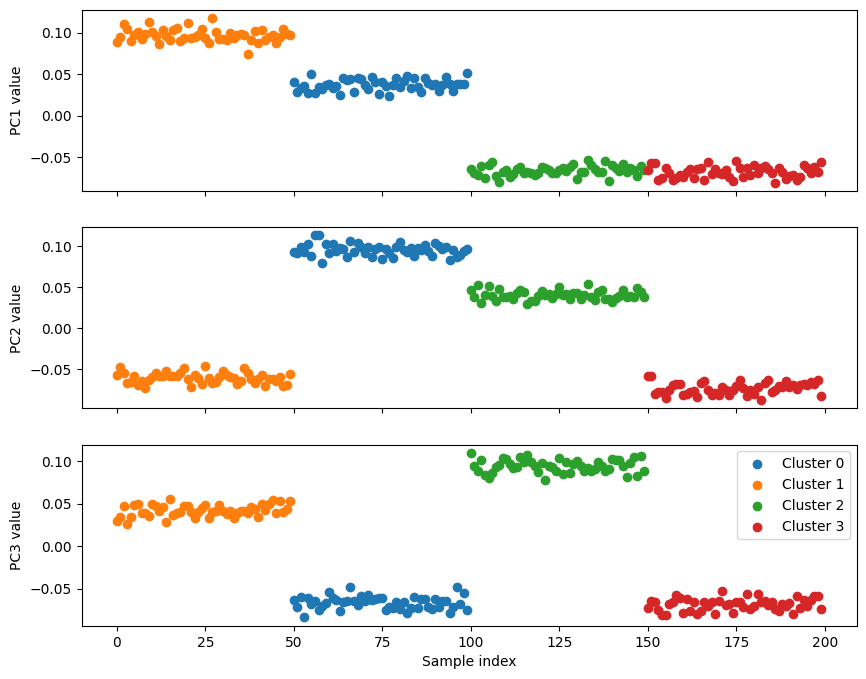

In [69]:
np.random.seed(420)
n = 20
mean1 = np.zeros(n)
mean2 = mean1 + 1
mean3 = mean2 + 1
mean4 = mean3 + 1

mu1_3d = np.array([ 1,  1,  1])
mu2_3d = np.array([ 1, -1, -1])
mu3_3d = np.array([-1,  1, -1])
mu4_3d = np.array([-1, -1,  1])

def embed(mu_3d, n=20):
    v = np.zeros(n)
    v[:3] = mu_3d
    return v

mean1 = embed(mu1_3d, n)
mean2 = embed(mu2_3d, n)
mean3 = embed(mu3_3d, n)
mean4 = embed(mu4_3d, n)

covariance = np.eye(len(mean1))*0.01

samples1 = np.random.multivariate_normal(mean1, covariance, size=50)
samples2 = np.random.multivariate_normal(mean2, covariance, size=50)
samples3 = np.random.multivariate_normal(mean3, covariance, size=50)
samples4 = np.random.multivariate_normal(mean4, covariance, size=50)
R = np.vstack([samples1, samples2, samples3, samples4])
T = len(R)

kmeans = KMeans(n_clusters=4, random_state=420, n_init='auto')
kmeans.fit(R)
labels = kmeans.labels_

centers = kmeans.cluster_centers_

eigenvalues, eigenvectors = np.linalg.eig(R@R.T)
num_pcs = np.argmax(np.abs(np.diff(eigenvalues)))+1
pc1 = eigenvectors.real[:, 0]

fig, axes = plt.subplots(num_pcs, figsize=(10, 8), sharex=True)

unique_labels = np.unique(labels)

for lb in unique_labels:
    idx = labels == lb
    for i in range(num_pcs):
        axes[i].scatter(np.where(idx)[0], eigenvectors.real[idx,i], label=f"Cluster {lb}")
        axes[i].set_ylabel(f"PC{i+1} value")
plt.legend()
plt.xlabel("Sample index")
plt.show()